# Demos: Lecture 07

## Demo 1: Expectation values

In [25]:
import pennylane as qml
from pennylane import numpy as np

In [8]:
dev = qml.device('default.qubit', wires=1, shots=10000)

@qml.qnode(dev)
def measure_z():
    qml.RX(2*np.pi/3, wires=0)
    return qml.sample(qml.PauliZ(wires=0))

In [12]:
np.mean(measure_z())

tensor(-0.4944, requires_grad=True)

In [13]:
dev = qml.device("default.qubit", wires=1)

@qml.qnode(dev)
def measure_z_perfectly():
    qml.RX(2*np.pi/3, wires=0)
    return qml.expval(qml.PauliZ(0))

In [14]:
measure_z_perfectly()

tensor(-0.5, requires_grad=True)

In [15]:
dev = qml.device("default.qubit", wires=2)

@qml.qnode(dev)
def circuit(x):
    qml.Hadamard(wires=0)
    qml.CRX(x, wires=[0, 1])
    return qml.expval(qml.PauliZ(0) @ qml.PauliZ(1) )

In [16]:
circuit(0.2)

tensor(0.00996671, requires_grad=True)

In [17]:
@qml.qnode(dev)
def circuit(x):
    qml.Hadamard(wires=0)
    qml.CRX(x, wires=[0, 1])
    return qml.expval(qml.PauliZ(0)), qml.expval(qml.PauliZ(1))

In [18]:
circuit(0.2)

tensor([5.55111512e-17, 9.90033289e-01], requires_grad=True)

## Demo 2: gradient of a quantum circuit

<img src="fig/pauliz_opt.png" width="400px">

In [19]:
dev = qml.device("default.qubit", wires=1)

@qml.qnode(dev)
def pqc(theta):
    qml.RY(theta, wires=0)
    return qml.expval(qml.PauliZ(0))

In [20]:
import matplotlib.pyplot as plt

In [26]:
theta_vals = np.linspace(-2*np.pi, 2*np.pi, 10000)

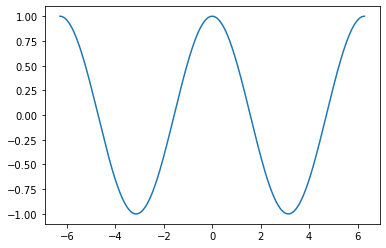

In [22]:
plt.plot(theta_vals, [pqc(t) for t in theta_vals])

In [23]:
gradient_function = qml.grad(pqc)

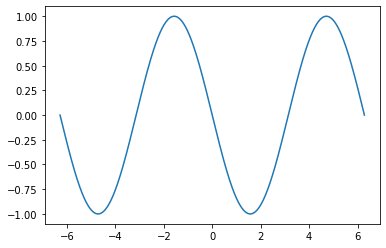

In [27]:
plt.plot(theta_vals, [gradient_function(t) for t in theta_vals])

## Demo 3: training a small PQC

In [30]:
opt = qml.GradientDescentOptimizer(stepsize=0.1)

num_iterations = 50

storage = []

init_param = np.array(0.2)
params = init_param.copy()

for _ in range(num_iterations):
    params, _cost = opt.step_and_cost(pqc, params)
    storage.append(_cost)

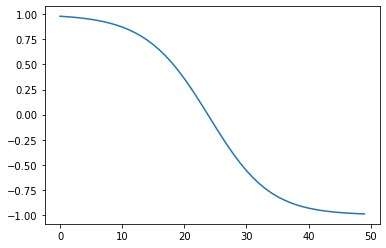

In [31]:
plt.plot(storage)

In [38]:
import numpy as np
import pennylane as qml

dev = qml.device("default.qubit", wires=3)

def original_operations():
    for wire in range(3):
        qml.Hadamard(wires=wire)
    qml.CZ(wires=[0, 1])
    qml.CZ(wires=[1, 2])


def question_mark_box(y):
    qml.RY(y, wires=1)
    
def create_entangled_state(wires):
    qml.Hadamard(wires=wires[0])
    qml.CNOT(wires=[wires[0], wires[1]])


@qml.qnode(dev)
def quiz_3_qnode(y):
    original_operations()
    
    m1 = qml.measure(wires=0)
    qml.cond(m1, qml.RY)(y, wires=1)
    qml.cond(m1, qml.adjoint(create_entangled_state))([1, 2])
    
    return qml.probs(wires=[1, 2])

In [39]:
quiz_3_qnode(0.4)

tensor([0.47235459, 0.125     , 0.125     , 0.27764541], requires_grad=True)